<a href="https://colab.research.google.com/github/Arthur2303/Digital-Signal-Processing/blob/main/FFT_by_Decimation_In_Time_(DIT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Student: Arthur Henrique \\
Professor: Edmar Gurjão \\
Course: Digital Signal Processing

Implementation of FFT by the decimation algorithm in time

$$X[k] = \sum\limits_{n\ par}^{N/2-1}x(n)W_N^{kn} + \sum\limits_{n\ ímpar}^{N/2-1}x(n)W_N^{kn}$$

$$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_{N/2})^{k r}$$

representing the odd and even components of $x(n)$ by

$$x_e(n) = x(2n)$, $n = 0, 1, ..., N/2 -1$$  e

$$x_o(n) = x(2n + 1)$, $n = 0, 1, ..., N/2 -1$$

We have

$$X[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$$

Let's call:

$$X_e[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r}$$ e

$$X_o[k] = \sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$$

each being a DFT of $N/2$ points


$$X[k] = X_e[k] + W_N^kX_o[k]$$

In [ ]:
def fft(x, n):
    """
    Summary: Implements the recursive FFT by decimation in time method with zero padding
    Parameters:
      - x (array): Discrete Signal
      -   n (int): Number of samples, it also defines the output's size

    Output: The array which is the FFT of the input array.
    """

    # Ensures the power of 2
    n = int(2 ** np.ceil(np.log2(n)))

    # Performs o zero padding
    if (n > len(x)):
      padding = np.zeros(n-len(x))
      x = np.concatenate((x, padding))

    # Stop recursion
    N = len(x)
    if N == 1:
        return x

    # twiddle factor
    w = np.exp(-2j * np.pi * np.arange(N//2) / N)

    # Even and Odds components
    x_even = fft(x[::2], N//2)
    x_odd  = fft(x[1::2], N//2)

    # Performs the butterfly idea
    return np.concatenate([x_even + w * x_odd, x_even - w * x_odd])


# Example
n = 8
x = np.array([0, 1, 0, 0, 0, 0, 0])
X = fft(x, n)

print("Input: x[n] =", x)
print("Output: X[k] =", X)


Entrada: x[n] = [0 1 0 0 0 0 0]
Saída: X[k] = [ 1.00000000e+00+0.j          7.07106781e-01-0.70710678j
  6.12323400e-17-1.j         -7.07106781e-01-0.70710678j
 -1.00000000e+00+0.j         -7.07106781e-01+0.70710678j
 -6.12323400e-17+1.j          7.07106781e-01+0.70710678j]
Tempo de execução: 0.002535104751586914 segundos


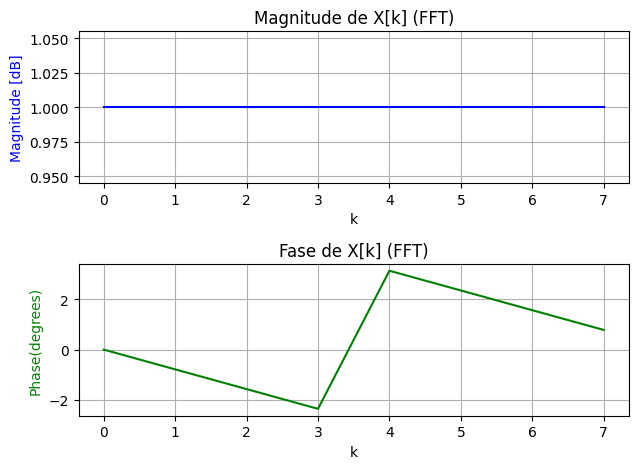

In [ ]:
# Plotando a magnitude e fase da FFT
plt.subplot(2, 1, 1)
plt.plot(np.abs(X), color = 'b')
plt.title("Magnitude de X[k] (FFT)")
plt.xlabel("k")
plt.ylabel('Magnitude [dB]', color='b')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.angle(X), color = 'g')
plt.title("Fase de X[k] (FFT)")
plt.xlabel("k")
plt.ylabel('Phase(degrees)', color='g')
plt.grid(True)

plt.tight_layout()


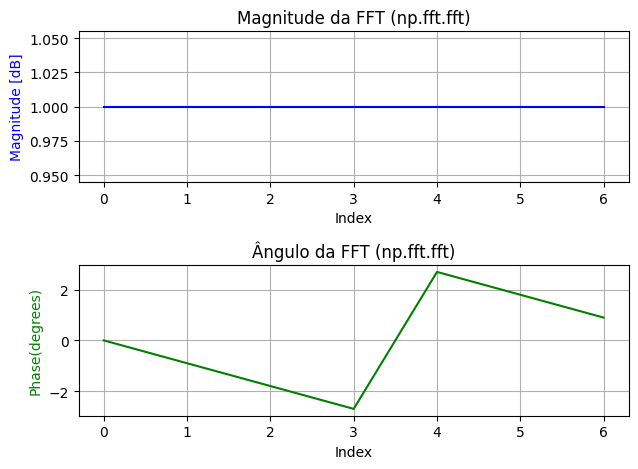

In [ ]:
# Calculando a FFT (Transformada de Fourier Discreta)
fft_resultado = np.fft.fft(x)

# Calculando a magnitude e o ângulo
magnitude = np.abs(fft_resultado)
angulo = np.angle(fft_resultado)

# Plotando a magnitude
plt.subplot(2, 1, 1)
plt.plot(magnitude, color='b')
plt.title('Magnitude da FFT (np.fft.fft)')
plt.xlabel('Index')
plt.ylabel('Magnitude [dB]', color='b')
plt.grid(True)

# Plotando o ângulo
plt.subplot(2, 1, 2)
plt.plot(angulo, color='g')
plt.title('Ângulo da FFT (np.fft.fft)')
plt.xlabel('Index')
plt.ylabel('Phase(degrees)', color='g')
plt.grid(True)

plt.tight_layout()